- Re-do problems 6 and 7 where my strategy is to **triple** my wager with each loss

______

- First, we'll simulate it to get some intuition

In [4]:
import numpy as np
import pandas as pd

In [2]:
def sim():
    won = False
    winnings = 0
    wager = 1
    list_path = []
    while not won:
        flip = np.random.randint(2)
        if flip == 1:
            winnings += wager            
            won = True
        else:
            winnings -= wager
            wager *=3
        list_path.append(winnings)
    return list_path

In [11]:
n_trials = 100
dict_results = {}

for i in range(n_trials):
    dict_results[i] = pd.Series(sim())

In [12]:
df = pd.DataFrame(dict_results)

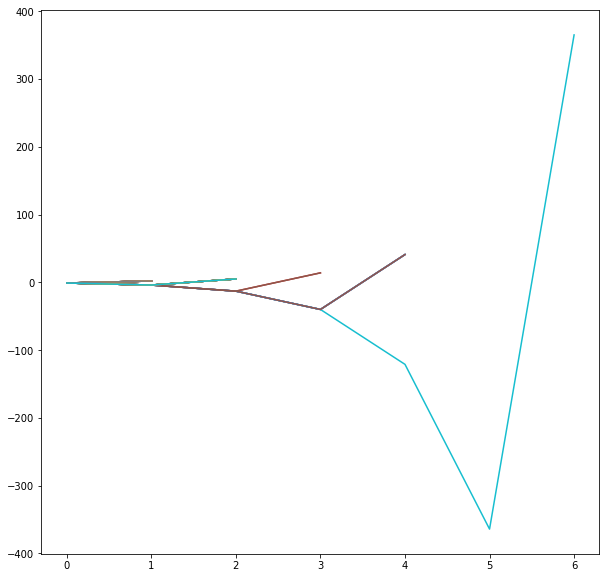

In [15]:
df.plot(legend = False, figsize = (10,10))

- As we can see, the winnings follow a function:

$$
Winnings_{i} = Winnings_{i-1}+3^{i-1}
$$

In [20]:
y = [1]

for i in range(1,7):
    y.append(y[i-1]+3**(i-1))

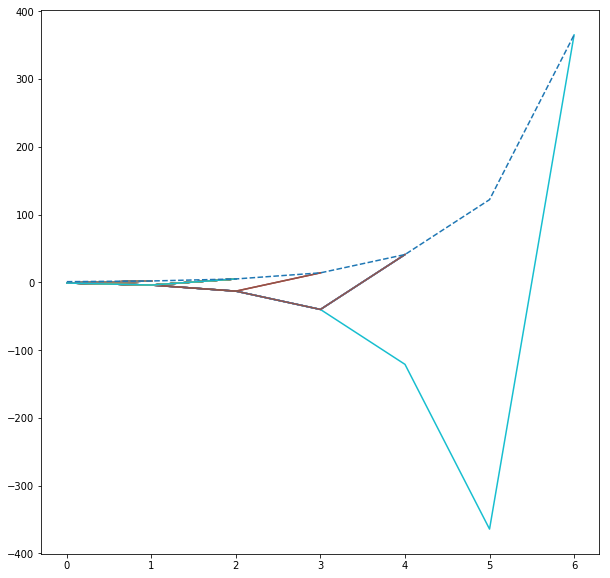

In [27]:
df['winnings'] = y
df.plot(legend = False, figsize = (10,10), style = { x:('-' if x!='winnings' else '--') for x in df.columns})

- So, before we actually derive the solution, we can simulate the expected winnings in two ways to make sure they tie out

### 1.

In [32]:
n_trials = 1000000
list_results = []

for i in range(n_trials):
    list_results.append(sim()[-1])
np.mean(list_results)

1094.198284

### 2.

In [42]:
def sim_alt():
    won = False
    i = 0
    total = 0
    while not won:
        if i == 0:
            total = 1
        else:
            total += 3**(i-1)  
            
        flip = np.random.randint(2)
        if flip == 1:
            won = True
        i += 1
    return total

In [44]:
n_trials = 1000000
list_results = []

for i in range(n_trials):
    list_results.append(sim_alt())
np.mean(list_results)

1086.510058

- Both seem to come out pretty close, but are super unstable

In [48]:
for j in range(10):
    n_trials = 100000
    list_results1 = []
    list_results2 = []

    for i in range(n_trials):
        list_results1.append(sim()[-1])
        list_results2.append(sim_alt())
    print('Test {} -- mean 1: {}, mean 2: {}'.format(j, np.mean(list_results1), np.mean(list_results2)))

Test 0 -- mean 1: 1257.46445, mean 2: 237.08949
Test 1 -- mean 1: 8162.45451, mean 2: 1716.2911
Test 2 -- mean 1: 758.14454, mean 2: 998.41545
Test 3 -- mean 1: 870.40426, mean 2: 949.27032
Test 4 -- mean 1: 1463.19482, mean 2: 2661.18942
Test 5 -- mean 1: 2477.83561, mean 2: 155.34101
Test 6 -- mean 1: 232.12688, mean 2: 597.06966
Test 7 -- mean 1: 1030.19814, mean 2: 279.79765
Test 8 -- mean 1: 712.82065, mean 2: 264.84368
Test 9 -- mean 1: 630.47462, mean 2: 834.62565


- Doing a simple sum

In [63]:
winnings = 1
expected_winnings = (1/2)*winnings

for i in range(1, 1500):
    winnings += 3**(i-1)
    expected_winnings += (winnings/2**(i+1))
expected_winnings

6.852650585738195e+263